# **BÀI 1: LOGICAL THINKING**

**Đề bài:** Tú là một người bán hàng và đang muốn bán mĩ phẩm online. Sau một hồi nghiên cứu tìm hiểu thì anh ta quyết định lựa chọn bán hàng trên một sàn thương mại điện tử tên là ABC.vn vì đây có vẻ là một sàn thương mại điện tử uy tín. Tuy nhiên anh ta còn đang băn khoăn không biết rằng liệu tổng số đơn hàng và doanh thu mà anh ta sẽ kiếm được thông qua website ABC.vn liệu sẽ là bao nhiêu và muốn nhận được tư vấn từ team ABC.vn. Với vai trò là data analyst của ABC.vn và bạn có quyền truy cập kho dữ liệu của ABC.vn (bao gồm thông tin các đơn hàng, mặt hàng, giá trị đơn hàng, v.v.), bạn sẽ ước lượng doanh số bán hàng thông trên ABC.vn cho Tú như thế nào?

Hãy tự đưa ra những giả định cần thiết để phục vụ cho câu trả lời của bạn.


**Trả lời:** 

Ước lượng doanh số bán hàng mặt hàng mỹ phẩm mà Tú muốn kinh doanh dựa trên: 


*   Tính tổng số đơn hàng và doanh thu của các người bán hàng hiện tại bán mỹ phẩm trên nền tảng website ABC theo tháng, năm => đưa ra được doanh số trung bình và số đơn hàng trung bình một shop mĩ phẩm trên website trong 1 năm
*   Tìm ra top 10 sản phâm có doanh thu cao nhất trong lĩnh vực mĩ phẩm trong 1 năm , 1 quý, và 1 tháng gần nhất => tìm ra loại sản phẩm chạy nhất (sữa rửa mặt, kem dưỡng,...) để đề xuất cho Tú nên kinh doanh mặt hàng nào 
*   Tìm ra top 10 shop mĩ phẩm bán chạy nhất trên website trong 1 năm trở lại đây, tính tỷ lệ quay lại của khách hàng => tìm ra được mô hình các shop mĩ phẩm được yêu thích trên website ABC, tư vấn cho Tú cách marketing hoặc cách bán hàng trên website hiệu quả 
*   Sau khi tư vấn cho Tú chọn mặt hàng, cách thức bán hàng,... => dựa vào dữ liệu kinh doanh của shop gần giống với yêu cầu của Tú nhất để tư vấn về doanh thu, số đơn hàng Tú có thể đạt được







# **BÀI 2: CASE STUDY**

# **1.Xử lý dữ liệu**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **1.1.Mô tả dữ liệu**

In [ ]:
ecom = pd.read_csv("/content/drive/MyDrive/Data/data_ecommerce.csv")

In [ ]:
ecom.shape

(2145, 7)

In [ ]:
ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2145 entries, 0 to 2144
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Seller ID               2145 non-null   int64 
 1   Seller's Main Category  2145 non-null   object
 2   Sign-up Time            2145 non-null   object
 3   Activation Time         2145 non-null   object
 4   1st Listing             2145 non-null   object
 5   1st Salable             2145 non-null   object
 6   1st Transaction         2145 non-null   object
dtypes: int64(1), object(6)
memory usage: 117.4+ KB


In [ ]:
ecom.describe()

,Seller ID
count,2145.000000
mean,1073.000000
std,619.352484
min,1.000000
25%,537.000000
50%,1073.000000
75%,1609.000000
max,2145.000000


In [ ]:
ecom.head()

,Seller ID,Seller's Main Category,Sign-up Time,Activation Time,1st Listing,1st Salable,1st Transaction
0,1,Electronic,9/20/2017,2/2/2018,2/7/2018,10/6/2018,10/10/2018
1,2,BBFF,8/19/2017,5/24/2018,8/13/2018,8/14/2018,9/2/2018
2,3,BBFF,12/4/2017,5/4/2018,10/6/2018,10/10/2018,10/12/2018
3,4,BBFF,10/16/2017,4/23/2018,7/4/2018,7/10/2018,7/10/2018
4,5,BBFF,12/13/2017,7/25/2018,8/30/2018,8/31/2018,9/14/2018


## **1.2.Thêm cột**

In [ ]:
#1- Thêm các cột tính khoảng thời gian giữa các hành động của người bán
#đổi kiểu dữ liệu từ object sang datetime

ecom['Activation Time'] = pd.to_datetime(ecom['Activation Time'])
ecom['Sign-up Time'] = pd.to_datetime(ecom['Sign-up Time'])
ecom['1st Listing'] = pd.to_datetime(ecom['1st Listing'])
ecom['1st Salable'] = pd.to_datetime(ecom['1st Salable'])
ecom['1st Transaction'] = pd.to_datetime(ecom['1st Transaction'])

In [ ]:
#thêm cột
# thời gian giữa Sign-up Time và Activation Time
ecom['sign_act'] = (ecom['Activation Time'] - ecom['Sign-up Time'] ) / np.timedelta64(1, 'D')

# thời gian giữa Activation Time và 1st Listing
ecom['act_list'] = (ecom['1st Listing'] - ecom['Activation Time'] ) / np.timedelta64(1, 'D')

# thời gian giữa 1st Listing và 1st Salable
ecom['list_sala'] = (ecom['1st Salable'] - ecom['1st Listing'] ) / np.timedelta64(1, 'D')

# thời gian giữa 1st Salable và 1st Transaction
ecom['sala_transac'] = (ecom['1st Transaction'] - ecom['1st Salable'] ) / np.timedelta64(1, 'D')

# thời gian từ lúc đăng ký đến lúc bán được đơn hàng đầu tiên
ecom['total_days'] = (ecom['1st Transaction'] - ecom['Sign-up Time'] ) / np.timedelta64(1, 'D')

In [ ]:
# Thêm cột tháng, năm của sign-up
ecom['sign_up_month'] = ecom['Sign-up Time'].dt.month
ecom['sign_up_year']  = ecom['Sign-up Time'].dt.year

In [ ]:
#Thêm cột tháng, năm của 1st transaction
ecom['transaction_month'] = ecom['1st Transaction'].dt.month
ecom['transaction_year']  = ecom['1st Transaction'].dt.year

In [ ]:
# kết quả sau khi thêm cột
ecom.head()

,Seller ID,Seller's Main Category,Sign-up Time,Activation Time,1st Listing,1st Salable,1st Transaction,sign_act,act_list,list_sala,sala_transac,total_days,sign_up_month,sign_up_year,transaction_month,transaction_year
0,1,Electronic,2017-09-20,2018-02-02,2018-02-07,2018-10-06,2018-10-10,135.0,5.0,241.0,4.0,385.0,9,2017,10,2018
1,2,BBFF,2017-08-19,2018-05-24,2018-08-13,2018-08-14,2018-09-02,278.0,81.0,1.0,19.0,379.0,8,2017,9,2018
2,3,BBFF,2017-12-04,2018-05-04,2018-10-06,2018-10-10,2018-10-12,151.0,155.0,4.0,2.0,312.0,12,2017,10,2018
3,4,BBFF,2017-10-16,2018-04-23,2018-07-04,2018-07-10,2018-07-10,189.0,72.0,6.0,0.0,267.0,10,2017,7,2018
4,5,BBFF,2017-12-13,2018-07-25,2018-08-30,2018-08-31,2018-09-14,224.0,36.0,1.0,14.0,275.0,12,2017,9,2018


In [ ]:
ecom.describe()

,Seller ID,sign_act,act_list,list_sala,sala_transac,total_days,sign_up_month,sign_up_year,transaction_month,transaction_year
count,2145.000000,2145.000000,2145.000000,2145.000000,2145.000000,2145.000000,2145.000000,2145.000000,2145.000000,2145.0
mean,1073.000000,16.342191,12.070396,12.218182,11.131469,51.762238,5.799068,2017.994406,7.454545,2018.0
std,619.352484,23.741817,25.682007,20.501819,20.380166,43.541961,2.205446,0.074604,1.917347,0.0
min,1.000000,0.000000,-129.000000,-2.000000,-9.000000,1.000000,1.000000,2017.000000,2.000000,2018.0
25%,537.000000,4.000000,0.000000,1.000000,1.000000,22.000000,4.000000,2018.000000,6.000000,2018.0
50%,1073.000000,8.000000,6.000000,5.000000,4.000000,39.000000,6.000000,2018.000000,8.000000,2018.0
75%,1609.000000,19.000000,18.000000,14.000000,12.000000,69.000000,8.000000,2018.000000,9.000000,2018.0
max,2145.000000,278.000000,209.000000,241.000000,193.000000,385.000000,12.000000,2018.000000,10.000000,2018.0


### **Nhận xét 1**


*   Thời gian trung bình cho mỗi người bán từ lúc bắt đầu đăng ký đến khi có đơn hàng đầu tiên là 51 ngày => Thời gian này là quá dài và có thể khiến người bán mất động lực kinh doanh trên nền tảng website ABC => **Có thể giảm thời gian xét duyệt tài khoản (activation) cho tài khoản mới đăng ký trong khoảng 5-7 ngày để giảm thời gian người bán chờ đợi tài khoản xác thực**
*   Thời gian dài nhất trong mỗi hành động của người bán trên website đang quá lớn (>200 ngày), đặc biệt thời gian từ lúc đăng ký đến khi tài khoản active (278 ngày) là quá dài => trong thời gian chờ active tài khoản 278 ngày, người bán có thể chọn nền tảng kinh doanh khác => cần hạn chế các trường hợp xác thực tài khoản dài quá 30 ngày
*   Thời gian kể từ khi người bán có tài khoản được xác thực đến khi người bán listing sản phẩm đầu tiên trung bình là 12 ngày => có thể rút ngắn thời gian này bằng cách đưa ra gợi ý mặt hàng cho người bán 



## **1.3.Kiểm tra dữ liệu**

In [ ]:
check = ecom.loc[(ecom['sign_act'] < 0)| (ecom['act_list'] < 0)|(ecom['list_sala'] < 0)|(ecom['sala_transac'] < 0)]
check

,Seller ID,Seller's Main Category,Sign-up Time,Activation Time,1st Listing,1st Salable,1st Transaction,sign_act,act_list,list_sala,sala_transac,total_days
14,15,BBFF,2018-01-30,2018-03-02,2018-08-09,2018-08-11,2018-08-10,31.0,160.0,2.0,-1.0,192.0
16,17,BBFF,2018-04-05,2018-04-27,2018-04-20,2018-10-15,2018-10-16,22.0,-7.0,178.0,1.0,194.0
17,18,BBFF,2018-02-02,2018-03-05,2018-02-27,2018-08-06,2018-08-06,31.0,-6.0,160.0,0.0,185.0
34,35,Electronic,2018-04-21,2018-04-27,2018-09-29,2018-10-06,2018-10-05,6.0,155.0,7.0,-1.0,167.0
38,39,BBFF,2018-04-20,2018-06-22,2018-05-16,2018-09-29,2018-09-28,63.0,-37.0,136.0,-1.0,161.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2135,2136,LifeStyle,2018-09-24,2018-09-28,2018-09-24,2018-09-25,2018-10-09,4.0,-4.0,1.0,14.0,15.0
2138,2139,Electronic,2018-10-01,2018-10-02,2018-10-03,2018-10-02,2018-10-09,1.0,1.0,-1.0,7.0,8.0
2139,2140,Digital Service,2018-10-03,2018-10-04,2018-10-05,2018-10-04,2018-10-08,1.0,1.0,-1.0,4.0,5.0
2141,2142,Electronic,2018-10-10,2018-10-15,2018-10-11,2018-10-11,2018-10-15,5.0,-4.0,0.0,4.0,5.0


In [ ]:
check1 = ecom.loc[ecom['act_list'] < 0 ]
check1

,Seller ID,Seller's Main Category,Sign-up Time,Activation Time,1st Listing,1st Salable,1st Transaction,sign_act,act_list,list_sala,sala_transac
16,17,BBFF,2018-04-05,2018-04-27,2018-04-20,2018-10-15,2018-10-16,22.0,-7.0,178.0,1.0
17,18,BBFF,2018-02-02,2018-03-05,2018-02-27,2018-08-06,2018-08-06,31.0,-6.0,160.0,0.0
38,39,BBFF,2018-04-20,2018-06-22,2018-05-16,2018-09-29,2018-09-28,63.0,-37.0,136.0,-1.0
44,45,LifeStyle,2018-04-18,2018-09-21,2018-09-13,2018-09-21,2018-10-04,156.0,-8.0,8.0,13.0
57,58,Digital Service,2018-03-23,2018-08-09,2018-04-02,2018-08-16,2018-10-10,139.0,-129.0,136.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...
2131,2132,Electronic,2018-09-12,2018-09-14,2018-09-13,2018-09-13,2018-10-15,2.0,-1.0,0.0,32.0
2133,2134,BBFF,2018-09-17,2018-09-19,2018-09-18,2018-09-18,2018-09-21,2.0,-1.0,0.0,3.0
2134,2135,LifeStyle,2018-09-18,2018-09-20,2018-09-19,2018-09-19,2018-09-25,2.0,-1.0,0.0,6.0
2135,2136,LifeStyle,2018-09-24,2018-09-28,2018-09-24,2018-09-25,2018-10-09,4.0,-4.0,1.0,14.0


### **Nhận xét 2**

Một người bán hàng trên ABC.vn thường trải qua các bước sau:
- Đăng ký-> Account của người bán được kích hoạt bởi ABC team-> Listing sản phẩm (upload thông tin, hình ảnh) -> Chuẩn bị sản phẩm để sẵn sàng bán (Stocking to make products available for sales) -> Phát sinh giao dịch

=> **số ngày giữa các hành động trên phải >= 0**

*   **Thực tế có 536 dòng trên tổng số 2145 dòng có dữ liệu ngày nhỏ hơn 0 => 25% dữ liệu có vấn đề** 
*   **Trong 536 dòng đó có 424 dòng là khoảng thời gian giữa tài khoản được kích hoạt và listing mặt hàng => lỗi web khi người bán có thể listing trước khi tài khoản được active**




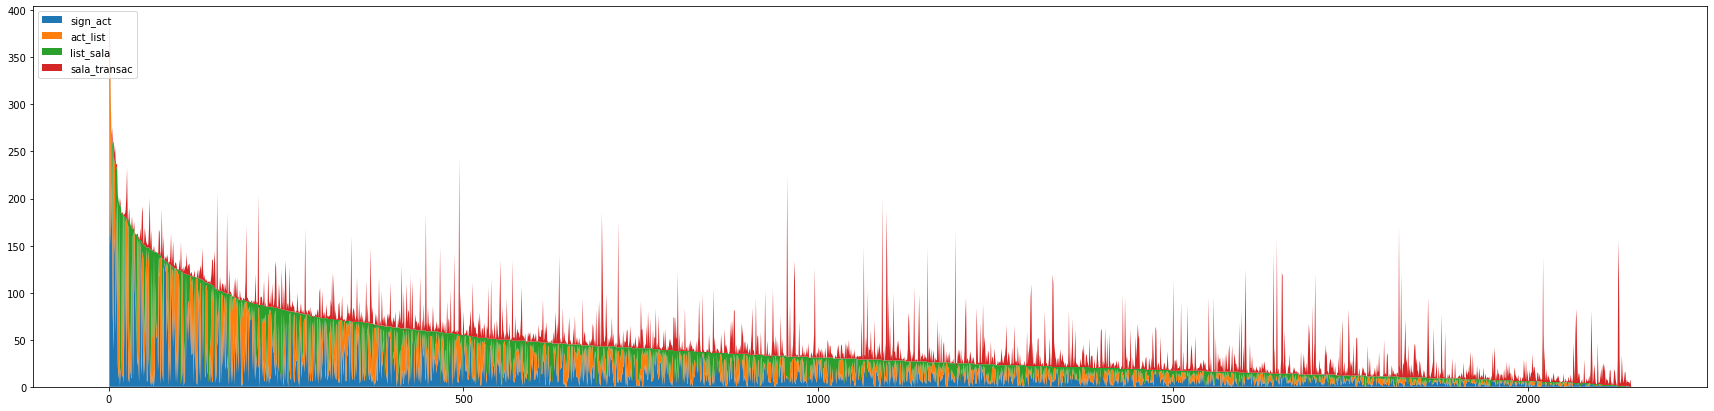

In [ ]:

seller_id = ecom['Seller ID'].tolist()
sign_act = ecom['sign_act'].tolist()
act_list = ecom['act_list'].tolist()
list_sala = ecom['list_sala'].tolist()
sala_transac = ecom['sala_transac'].tolist()

plt.figure(figsize=(30, 7))
plt.stackplot(seller_id,sign_act,act_list,list_sala,sala_transac, labels = ['sign_act','act_list','list_sala','sala_transac'])
plt.legend(loc='upper left')

# **2.Data Visualization**

## **2.1. Số người bán đăng ký theo tháng & số người bán có đơn hàng đầu tiên theo tháng**

In [ ]:
sign_up = pd.pivot_table(ecom, values=['Seller ID'], index='sign_up_month',columns ='sign_up_year',
               aggfunc ='count',fill_value=0).reset_index

sign_up

<bound method DataFrame.reset_index of               Seller ID     
sign_up_year       2017 2018
sign_up_month               
1                     0   55
2                     0   60
3                     0  254
4                     0  297
5                     0  330
6                     0  298
7                     0  251
8                     1  333
9                     2  220
10                    3   35
11                    3    0
12                    3    0>

In [ ]:
transac = pd.pivot_table(ecom, values=['Seller ID'], index='transaction_month',columns ='transaction_year',
               aggfunc ='count',fill_value=0).reset_index()
transac

,transaction_month,Seller ID
transaction_year,,2018
0,2,4
1,3,49
2,4,135
3,5,193
4,6,283
5,7,324
6,8,394
7,9,418
8,10,345


### **Nhận xét 3**



*   Số người bán đăng ký bán hàng trên website ABC và số người bán bán được đơn hàng đầu tiên có xu hướng tăng => Website ABC đang tăng trưởng ổn định 



## **2.2. Thời gian trung bình các hoạt động của người bán theo category**

In [ ]:
category = pd.pivot_table(ecom, values=['Seller ID','sign_act','act_list','list_sala','sala_transac','total_days'], index="Seller's Main Category",
               aggfunc = {'Seller ID': 'count',
                            'sign_act': np.mean,
                             'act_list': np.mean,
                              'list_sala' : np.mean,
                              'sala_transac': np.mean,
                               'total_days': np.mean}).reset_index()
category

,Seller's Main Category,Seller ID,act_list,list_sala,sala_transac,sign_act,total_days
0,BBFF,1130,14.355752,13.162832,8.620354,15.848673,51.987611
1,Book,130,4.276923,11.207692,6.253846,16.869231,38.607692
2,Digital Service,122,3.131148,8.459016,23.000000,23.049180,57.639344
3,Electronic,262,13.328244,11.564885,13.484733,14.583969,52.961832
4,LifeStyle,501,10.457086,11.606786,13.940120,16.604790,52.608782


In [ ]:
cate = category["Seller's Main Category"].tolist()
total_id = category["Seller ID"].tolist()
ca_sign_act = category['sign_act'].tolist()
ca_act_list = category['act_list'].tolist()
ca_list_sala = category['list_sala'].tolist()
ca_sala_transac = category['sala_transac'].tolist()
ca_total_days = category['total_days'].tolist()

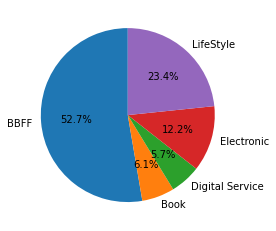

In [ ]:
plt.pie(total_id, labels = cate, startangle = 90,autopct='%1.1f%%')
plt.show() 

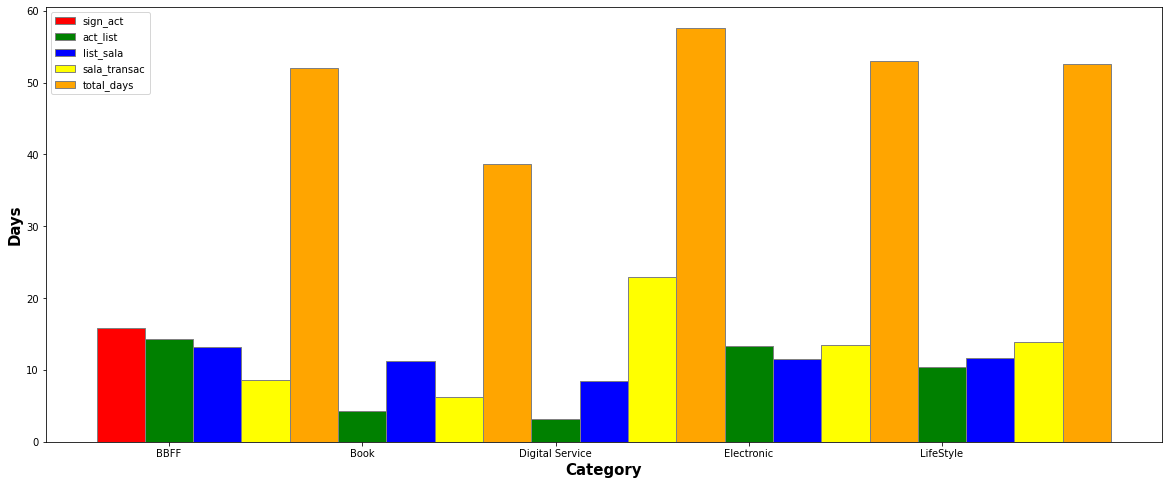

In [ ]:
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(20, 8))
 
# Set position of bar on X axis
br1 = np.arange(len(ca_sign_act))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]

# Make the plot
plt.bar(br1, ca_sign_act, color ='red', width = barWidth,
        edgecolor ='grey', label ='sign_act')
plt.bar(br2, ca_act_list, color ='green', width = barWidth,
        edgecolor ='grey', label ='act_list')
plt.bar(br3, ca_list_sala, color ='blue', width = barWidth,
        edgecolor ='grey', label ='list_sala')
plt.bar(br4, ca_sala_transac, color ='yellow', width = barWidth,
        edgecolor ='grey', label ='sala_transac')
plt.bar(br5, ca_total_days, color ='orange', width = barWidth,
        edgecolor ='grey', label ='total_days')

# Adding Xticks
plt.xlabel('Category', fontweight ='bold', fontsize = 15)
plt.ylabel('Days', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(ca_sign_act))],
        ['BBFF', 'Book', 'Digital Service', 'Electronic', 'LifeStyle'])
 
plt.legend()
plt.show()

### **Nhận xét 4**



*   **Mặt hàng phổ biến trên website ABC là BBFF (52,7%), LifeStyle (23,4%)**
*   **Mặt hàng có tổng thời gian từ khi người bán đăng ký đến khi có đơn hàng ít nhất là Book => người bán muốn có doanh thu nhanh thì chọn book**

*   **Mặt hàng có thời gian từ khi có hàng bán đến khi có đơn hàng đầu tiên ngắn nhất là BBFF và Book**

Có >50% người bán BBFF trên nền tảng ABC => người mua thường mua mặt hàng BBFF trên ABC nên thời gian để người bán có đơn là rất nhanh, BBFF 

Chỉ có 6,1% người bán bán sách trên ABC, dù vậy thời gian để có đơn hàng đầu tiên trên ABC lại là ngắn nhất => Book cũng là một mặt hàng được yêu thích trên website ABC, tuy nhiên lại rất ít người bán => thu hút thêm người bán Book

*   **Digital Service là mặt hàng khó bán trên website ABC** do có thời gian có đơn đầu tiên là dài nhất, đồng thời thời gian xác thực tài khoản của Digital Service cũng là dài nhất => **cải thiện thời gian xác thực nhanh hơn** để giúp người bán Digital Service có doanh thu nhanh hơn => thu hút được thêm người bán Digital Service




